### HR Analysis Case Study

This is the HR datasets. In our dataset 78000 rows and 14 columns. Creating a data analysis project using the provided HR dataset.

**Columns Name**

- employee_id
- department
- region
- education
- gender
- recruitment_channel
- no_of_trainings
- age 
- previous_year_rating
- length_of_service
- KPIs_met >80%
- awards_won?
- avg_training_score
- is_promoted

*Case study questions to guide your project.* 
These questions focus on understanding the dataset, identifying trends, and making predictions.

**1. Exploratory Data Analysis (EDA)**
   
What is the distribution of employees across departments and regions?

What is the gender distribution within each department?

What is the relationship between education and recruitment_channel? Do certain education levels correlate with specific recruitment channels?

What is the average age and length_of_service for employees? Are there outliers in the data?

What is the distribution of no_of_trainings and avg_training_score? Are there patterns or anomalies?



**2. Performance and Promotion Analysis**

What percentage of employees met KPIs (KPIs_met >80%) and won awards (awards_won?)?

What is the average previous_year_rating for employees who were promoted (is_promoted = 1) compared to those who were not?

Are there significant differences in avg_training_score between employees who were promoted and those who were not?



**3. Gender and Diversity Analysis**

Do promotion rates (is_promoted) differ between male and female employees? If so, what could be potential reasons?

Are there significant differences in avg_training_score, length_of_service, or previous_year_rating based on gender?

Does the distribution of employees across departments or regions vary by gender?



**4. Training and Development**

How does no_of_trainings correlate with avg_training_score and KPIs_met >80%?

Do employees with higher avg_training_score have a higher likelihood of being promoted?

Are there departments or regions with lower average training scores? What might be the implications?



**5. Key Drivers of Promotions**

What factors (e.g., length_of_service, previous_year_rating, avg_training_score, KPIs_met >80%, awards_won?) are most predictive of promotions (is_promoted)?

Does the likelihood of promotion vary significantly by department or recruitment channel?

Are employees with longer length_of_service more likely to be promoted?



**6. Awards and Recognition**

Are employees who win awards (awards_won?) more likely to be promoted? What other characteristics do they have in common?

Is there a relationship between previous_year_rating and the likelihood of winning awards?

Does winning awards correlate with higher KPIs_met >80% or better avg_training_score?



**7. Retention and Turnover Risk**

Are there employees with high length_of_service but low performance indicators (e.g., KPIs_met >80%, avg_training_score, previous_year_rating)? 

Could they be at risk of turnover or disengagement?

What is the relationship between age and length_of_service? Do older employees have higher or lower performance metrics?



**8. Predictive Modeling**

Can you build a predictive model to identify employees who are likely to be promoted (is_promoted)? Which features are most important?

Use models like logistic regression, decision trees, or random forests.

Can you predict avg_training_score based on employee attributes (e.g., no_of_trainings, age, length_of_service)?

Can you cluster employees into groups based on performance metrics like avg_training_score, KPIs_met >80%, and previous_year_rating?



**9. Department-Level Insights**

Which departments have the highest and lowest promotion rates?

Do certain departments consistently achieve higher KPIs_met >80% scores or win more awards?

How does avg_training_score vary across departments, and what are the implications for training programs?



**10. Insights for Management**

What actionable insights can you provide to improve promotion rates while maintaining fairness and equity?

Are there specific departments or regions where targeted training programs could improve performance?

What factors should management focus on to ensure high performers are recognized and promoted appropriately?



### **Project Workflow**


**Data Cleaning:** Handle missing values, standardize formats, and address outliers.

**EDA:** Generate summary statistics, visualizations, and uncover patterns.

**Hypothesis Testing:** Use statistical tests to confirm or reject hypotheses (e.g., gender differences in promotion rates).

**Model Building:** Create predictive models for promotion likelihood.

**Reporting:** Summarize insights in visual dashboards or reports.





In [85]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

# metapackage of all tidyverse packages
# loaded all libraries



library(tidyverse) 
library(tidyr)
library(janitor)
library(dplyr)
library(readr)
library(caret)
library(ggplot2)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "hranalysis"

In [33]:
# load dataset

test <- read_csv('/kaggle/input/hranalysis/test.csv')
train <- read_csv('/kaggle/input/hranalysis/train.csv')

Rows: 23490 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): department, region, education, gender, recruitment_channel
dbl (8): employee_id, no_of_trainings, age, previous_year_rating, length_of_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 54808 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): department, region, education, gender, recruitment_channel
dbl (9): employee_id, no_of_trainings, age, previous_year_rating, length_of_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**1. Exploratory Data Analysis (EDA)**

In [34]:
# inspect the structure of dataset

str(test)
str(train)

spc_tbl_ [23,490 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ employee_id         : num [1:23490] 8724 74430 72255 38562 64486 ...
 $ department          : chr [1:23490] "Technology" "HR" "Sales & Marketing" "Procurement" ...
 $ region              : chr [1:23490] "region_26" "region_4" "region_13" "region_2" ...
 $ education           : chr [1:23490] "Bachelor's" "Bachelor's" "Bachelor's" "Bachelor's" ...
 $ gender              : chr [1:23490] "m" "f" "m" "f" ...
 $ recruitment_channel : chr [1:23490] "sourcing" "other" "other" "other" ...
 $ no_of_trainings     : num [1:23490] 1 1 1 3 1 1 1 2 1 1 ...
 $ age                 : num [1:23490] 24 31 31 31 30 36 33 36 51 29 ...
 $ previous_year_rating: num [1:23490] NA 3 1 2 4 3 5 3 4 5 ...
 $ length_of_service   : num [1:23490] 1 5 4 9 7 2 3 3 11 2 ...
 $ KPIs_met >80%       : num [1:23490] 1 0 0 0 0 0 1 0 0 1 ...
 $ awards_won?         : num [1:23490] 0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : num [1:23490] 77 51 47 65 61 68 57

In [35]:
# check the class of datasets

class(test)  # dataset are in table class
class(train)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [36]:
# convert into dataframe.

test <- as.data.frame(test)
class(test)
str(test)


train <- as.data.frame(train)
class(train)
str(train)

[1] "data.frame"

'data.frame':	23490 obs. of  13 variables:
 $ employee_id         : num  8724 74430 72255 38562 64486 ...
 $ department          : chr  "Technology" "HR" "Sales & Marketing" "Procurement" ...
 $ region              : chr  "region_26" "region_4" "region_13" "region_2" ...
 $ education           : chr  "Bachelor's" "Bachelor's" "Bachelor's" "Bachelor's" ...
 $ gender              : chr  "m" "f" "m" "f" ...
 $ recruitment_channel : chr  "sourcing" "other" "other" "other" ...
 $ no_of_trainings     : num  1 1 1 3 1 1 1 2 1 1 ...
 $ age                 : num  24 31 31 31 30 36 33 36 51 29 ...
 $ previous_year_rating: num  NA 3 1 2 4 3 5 3 4 5 ...
 $ length_of_service   : num  1 5 4 9 7 2 3 3 11 2 ...
 $ KPIs_met >80%       : num  1 0 0 0 0 0 1 0 0 1 ...
 $ awards_won?         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : num  77 51 47 65 61 68 57 85 75 76 ...


[1] "data.frame"

'data.frame':	54808 obs. of  14 variables:
 $ employee_id         : num  65438 65141 7513 2542 48945 ...
 $ department          : chr  "Sales & Marketing" "Operations" "Sales & Marketing" "Sales & Marketing" ...
 $ region              : chr  "region_7" "region_22" "region_19" "region_23" ...
 $ education           : chr  "Master's & above" "Bachelor's" "Bachelor's" "Bachelor's" ...
 $ gender              : chr  "f" "m" "m" "m" ...
 $ recruitment_channel : chr  "sourcing" "other" "sourcing" "other" ...
 $ no_of_trainings     : num  1 1 1 2 1 2 1 1 1 1 ...
 $ age                 : num  35 30 34 39 45 31 31 33 28 32 ...
 $ previous_year_rating: num  5 5 3 1 3 3 3 3 4 5 ...
 $ length_of_service   : num  8 4 7 10 2 7 5 6 5 5 ...
 $ KPIs_met >80%       : num  1 0 0 0 0 0 0 0 0 1 ...
 $ awards_won?         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : num  49 60 50 50 73 85 59 63 83 54 ...
 $ is_promoted         : num  0 0 0 0 0 0 0 0 0 0 ...


In [37]:
# view the datasets

head(test)
head(train)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NA,1,1,0,77
2,74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51
3,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47
4,38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65
5,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61
6,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3,2,0,0,68


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
2,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
3,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
4,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
5,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0
6,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3,7,0,0,85,0


In [38]:
# Join the datasets

Hr_data <- test %>%
full_join(train)
head(Hr_data)

Joining with `by = join_by(employee_id, department, region, education, gender,
recruitment_channel, no_of_trainings, age, previous_year_rating,
length_of_service, `KPIs_met >80%`, `awards_won?`, avg_training_score)`


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NA,1,1,0,77,NA
2,74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51,NA
3,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47,NA
4,38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65,NA
5,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61,NA
6,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3,2,0,0,68,NA


In [39]:
# Arrange the dataset

arrange_hr_data <- Hr_data %>%
arrange(employee_id)
head(arrange_hr_data,6)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3,5,0,0,85,0
2,2,Finance,region_2,Master's & above,f,sourcing,1,35,1,2,0,0,63,0
3,3,Procurement,region_22,Master's & above,f,other,1,38,5,4,1,0,67,NA
4,4,Sales & Marketing,region_2,Bachelor's,m,other,1,25,3,2,0,0,53,0
5,5,Analytics,region_7,Master's & above,m,other,2,46,3,7,0,0,86,0
6,6,Sales & Marketing,region_15,Bachelor's,f,other,1,38,3,10,0,0,50,NA


In [40]:

colnames(arrange_hr_data)

[1] "employee_id"          "department"           "region"              
 [4] "education"            "gender"               "recruitment_channel" 
 [7] "no_of_trainings"      "age"                  "previous_year_rating"
[10] "length_of_service"    "KPIs_met >80%"        "awards_won?"         
[13] "avg_training_score"   "is_promoted"

In [41]:
# identify the duplicates and remove

dup_hr_data <- arrange_hr_data %>%
duplicated() %>%
table()
dup_hr_data

.
FALSE 
78298 

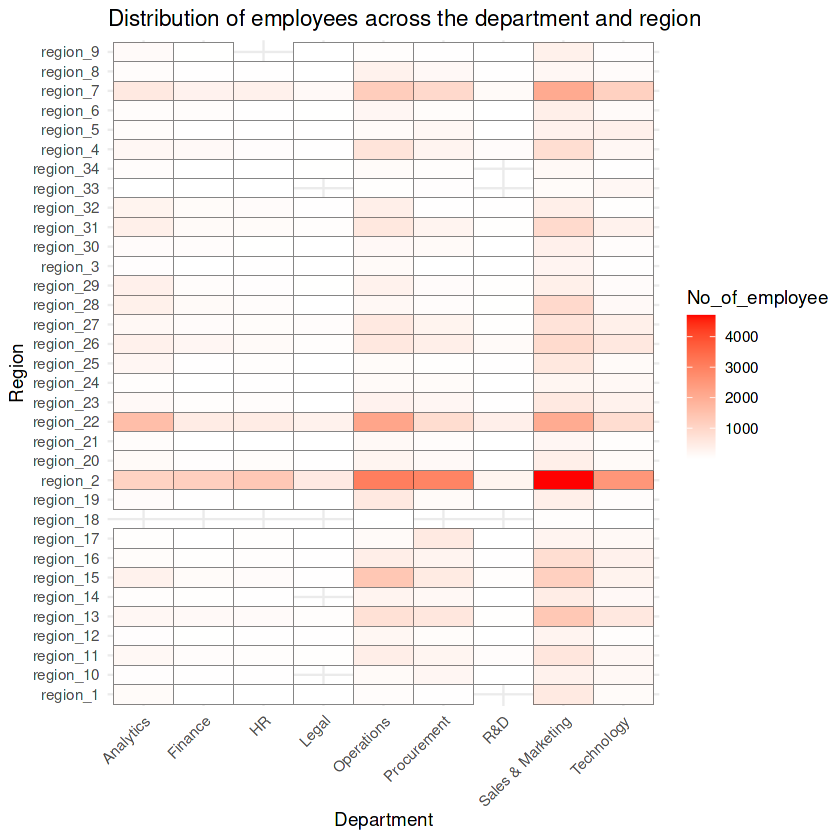

In [42]:
# Distribution of employees across the department and region

group_data <- arrange_hr_data %>%                                      
group_by(department,region) %>%
summarise(No_of_employee = n(),.groups = 'drop') %>%
arrange(desc(No_of_employee))

heatmap <- ggplot(group_data, aes(x = department,y = region))+
          geom_tile(aes(fill = No_of_employee), color = 'black')+
          scale_fill_gradient(high = 'red',low = 'white')+
          theme_minimal()+
          theme(axis.text.x = element_text(angle = 45, hjust = 1))+
          labs(title = 'Distribution of employees across the department and region',
              x = 'Department',
              y = 'Region')
heatmap



Department,Female,Male
<chr>,<int>,<int>
R&D,82,1357
Legal,196,1288
Analytics,736,6935
Finance,952,2675
HR,1459,2044
Technology,3959,6190
Sales & Marketing,4527,19628
Procurement,4646,5512
Operations,6649,9463


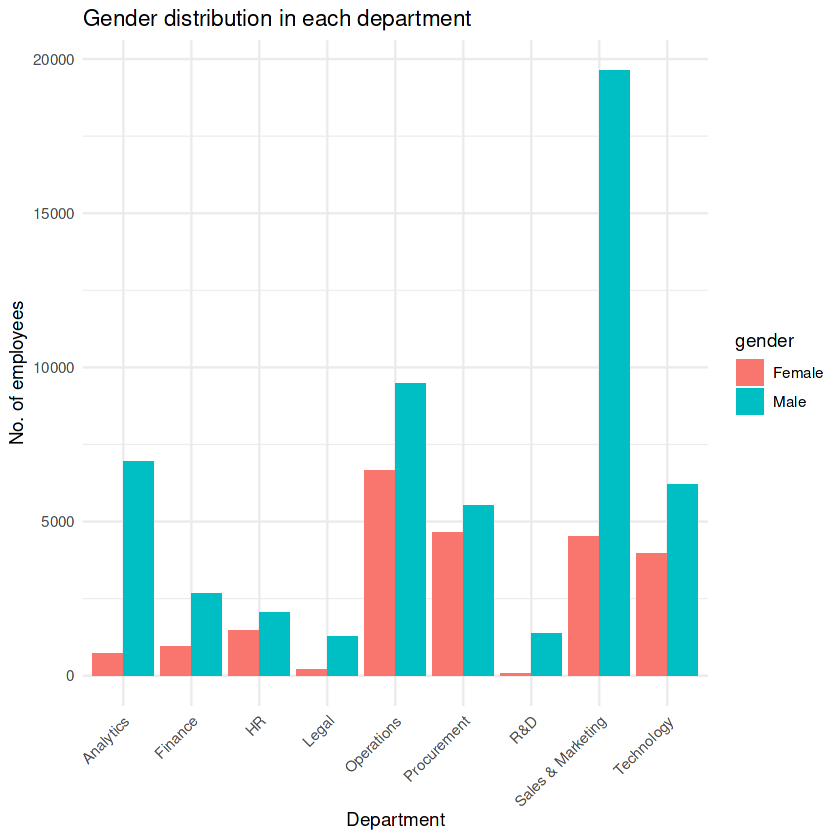

In [43]:
# gender distribution in each department

gender_data <- arrange_hr_data %>%                                      
group_by(gender,department) %>%
summarise(count = n(),.groups='drop') %>%
arrange(count)

separate <- gender_data %>%
pivot_wider(names_from = gender, values_from = count)

rename <- separate %>%
rename(Female = f, Male = m, Department = department)
rename

gender_plot <- ggplot(gender_data, aes(x = department, fill = gender)) +
  geom_bar(stat = "identity", position = "dodge", aes(y = count)) +  
  scale_y_continuous() +  
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  
  labs(title = "Gender distribution in each department",
       x = "Department",
       y = "No. of employees")+
scale_fill_discrete(labels = c('Female','Male'))

gender_plot

                  
                   other referred sourcing
  Bachelor's       28847     1232    22168
  Below Secondary    624       52      503
  Master's & above 12089      298     9042

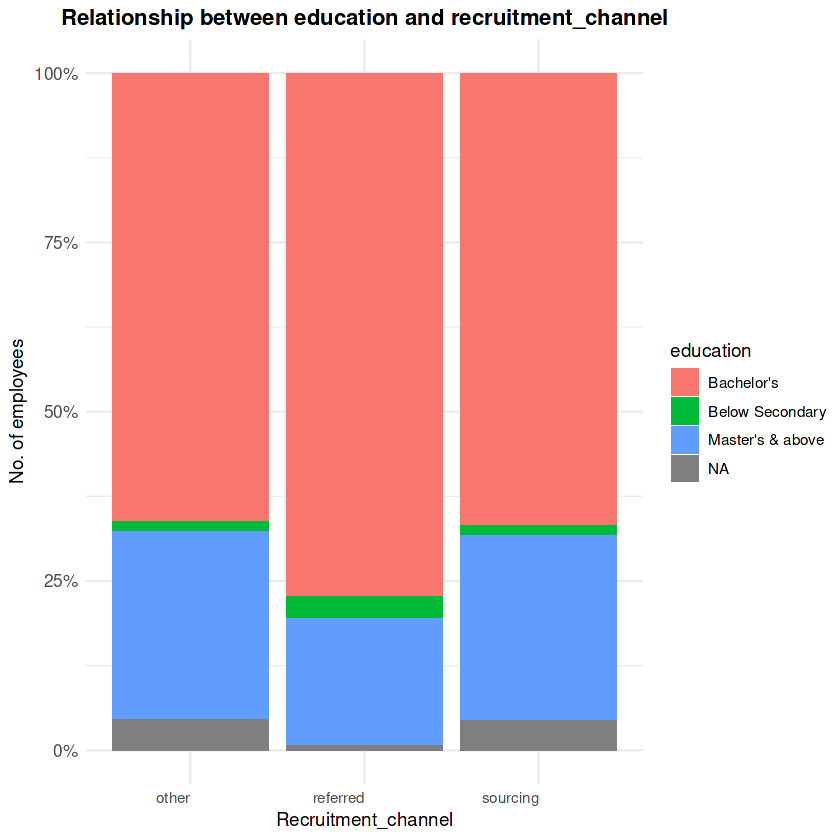

In [44]:
# relationship between education and recruitment_channel

relation <- table(arrange_hr_data$education, arrange_hr_data$recruitment_channel)
relation

rel <- ggplot(arrange_hr_data, aes(x = recruitment_channel, fill = education)) +
       geom_bar(position = 'fill') +
       labs(title = 'Relationship between education and recruitment_channel',
           x = 'Recruitment_channel',
           y = 'No. of employees') +
       scale_y_continuous(labels = scales::percent)+ # Convert y-axis to percentages
       theme_minimal()+
       theme(axis.text.x = element_text(hjust = 1),
             plot.title = element_text(hjust = 0.5, face = "bold", size = 13),
             axis.text.y = element_text(size = 10))
rel



In [45]:
# Calculating Mean, Standard deviation, hypothesis testing to find the relation

mean <- mean(relation)
cat("Mean =", mean, "\n")


sd <- sd(relation)
cat("SD =", sd, "\n")

hypothesis <- t.test(relation, mu = 8317.23)
hypothesis

Mean = 8317.222 
SD = 10788.52 



	One Sample t-test

data:  relation
t = -2.1628e-06, df = 8, p-value = 1
alternative hypothesis: true mean is not equal to 8317.23
95 percent confidence interval:
    24.4314 16610.0130
sample estimates:
mean of x 
 8317.222 


### Tested the relation between education and recruitment_channel.

**Condition** 

If the p-value is less than 0.05, there is a statistically significant relationship between education and recruitment_channel.



**Result**

After testing the mean, SD, hypothesis testing, considering the result *p-value = 1* is more than 0.05 (Specified value) it proves that there is no relationship between education and recruitment_channel.




,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3,5,0,0,85,0
2,2,Finance,region_2,Master's & above,f,sourcing,1,35,1,2,0,0,63,0
3,3,Procurement,region_22,Master's & above,f,other,1,38,5,4,1,0,67,NA
4,4,Sales & Marketing,region_2,Bachelor's,m,other,1,25,3,2,0,0,53,0
5,5,Analytics,region_7,Master's & above,m,other,2,46,3,7,0,0,86,0
6,6,Sales & Marketing,region_15,Bachelor's,f,other,1,38,3,10,0,0,50,NA


Avg_age =  34.79762 
Avg_service_period =  5.848974 


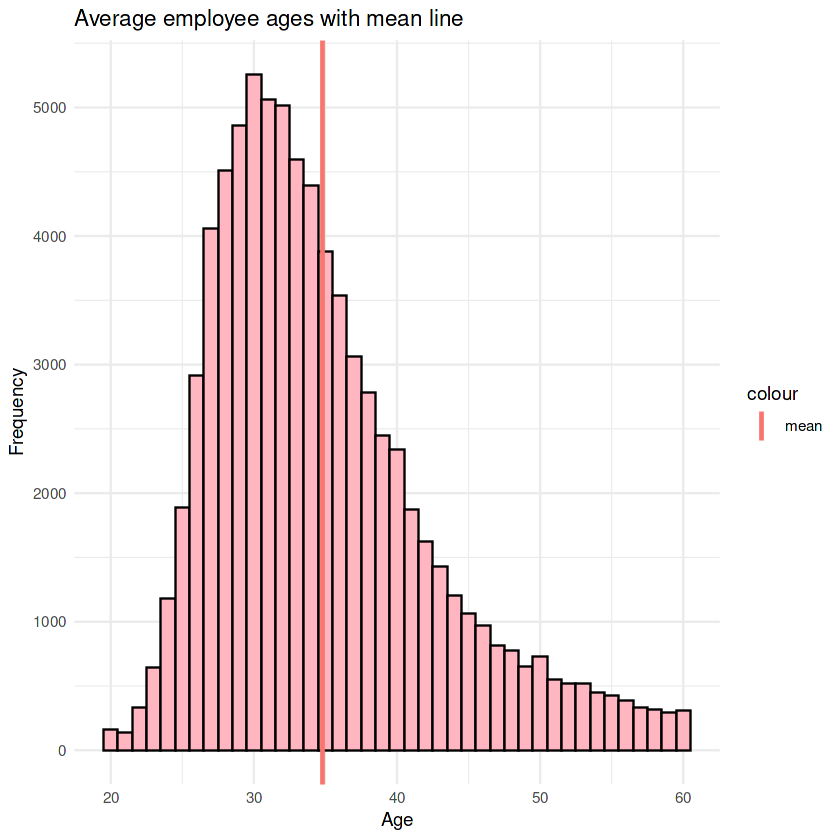

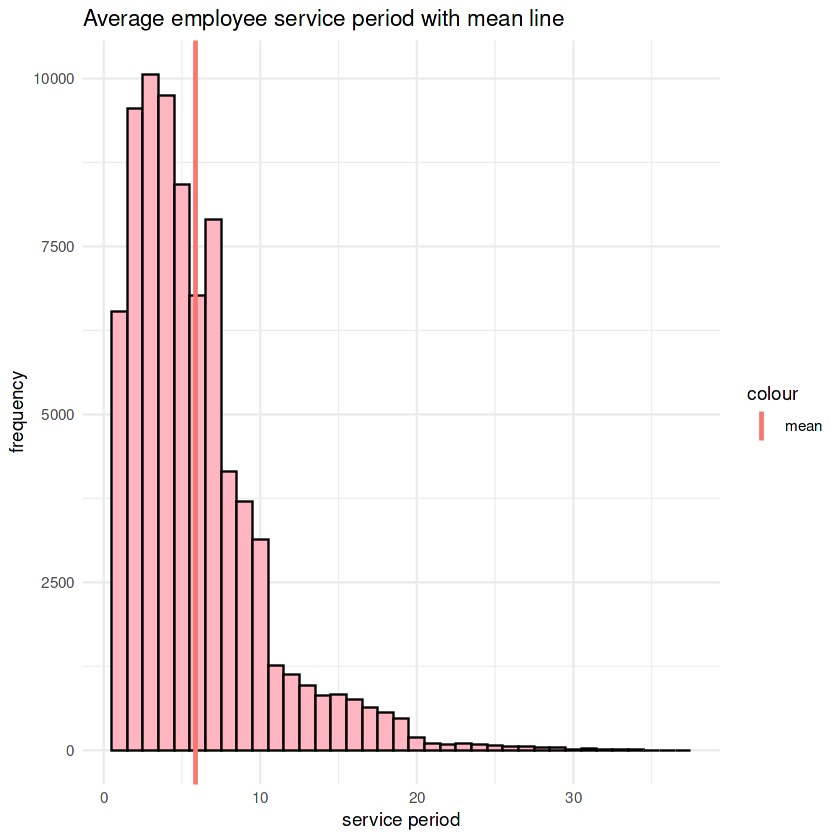

In [46]:
# Average age and length_of_service for employees and what Are there outliers in the data?

head(arrange_hr_data,6)

Avg_age <- mean(arrange_hr_data$age, na.rm = TRUE)  # Use na.rm = TRUE to handle missing values
cat("Avg_age = ", Avg_age, "\n")


Avg_Service_period <- mean(arrange_hr_data$length_of_service, na.rm = TRUE)
cat("Avg_service_period = ", Avg_Service_period, "\n")


avg_age <- ggplot(arrange_hr_data, aes(x = age))+
           geom_histogram(binwidth = 1, fill = 'lightpink', color = 'black')+
           geom_vline(aes(xintercept = mean(age, na.rm = TRUE), color = 'mean'),linetype = 'solid', size = 1)+
           theme_minimal()+
           labs(title = "Average employee ages with mean line", 
           x = "Age", 
           y = "Frequency")

avg_age


avg_SP <- ggplot(arrange_hr_data, aes(x=length_of_service))+
          geom_histogram(binwidth =1, fill = 'lightpink', color = 'black')+
          geom_vline(aes(xintercept = mean(length_of_service, na.rm = TRUE),color = 'mean'),linetype = 'solid', size = 1)+
          theme_minimal()+
          labs(title = 'Average employee service period with mean line',
               x = 'service period',
               y = 'frequency')
avg_SP

25% 
 14

75% 
 54

25% 
 -3

75% 
 13

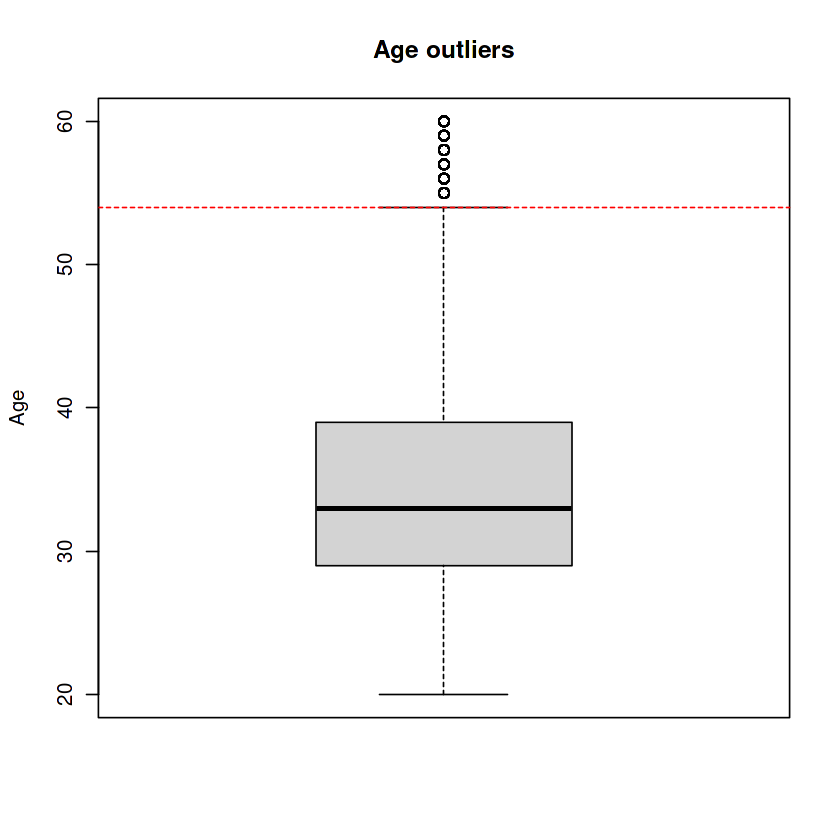

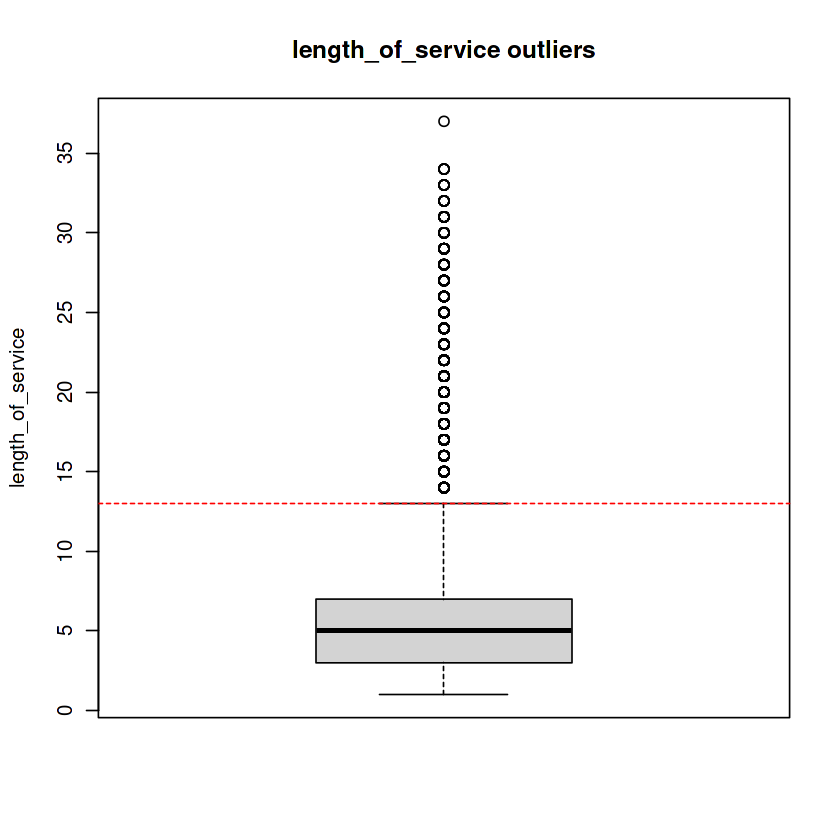

In [47]:
# outliers in Age of employees and service period of employees #

#calculate the IQR value for AGE
IQR <- IQR(arrange_hr_data$age)

#calculate lower and upper boundaries
lower_boundry <- quantile(arrange_hr_data$age, 0.25, na.rm = TRUE) - 1.5 * IQR
upper_boundry <- quantile(arrange_hr_data$age, 0.75, na.rm = TRUE) + 1.5 * IQR
lower_boundry
upper_boundry

# Boxplot with boundaries
boxplot(arrange_hr_data$age, main = "Age outliers", ylab = "Age")
abline(h = c(lower_boundry, upper_boundry), col = "red", lty = 2)  




#calculate the IQR value for Length_Of_Service
IQR <- IQR(arrange_hr_data$length_of_service)

#calculate lower and upper boundaries
lower_boundry <- quantile(arrange_hr_data$length_of_service, 0.25, na.rm = TRUE) - 1.5 * IQR
upper_boundry <- quantile(arrange_hr_data$length_of_service, 0.75, na.rm = TRUE) + 1.5 * IQR
lower_boundry
upper_boundry

# boxplot with boundaries
boxplot(arrange_hr_data$length_of_service, main = 'length_of_service outliers', ylab = 'length_of_service')
abline(h = c(lower_boundry, upper_boundry), col = 'red', lty = 2)

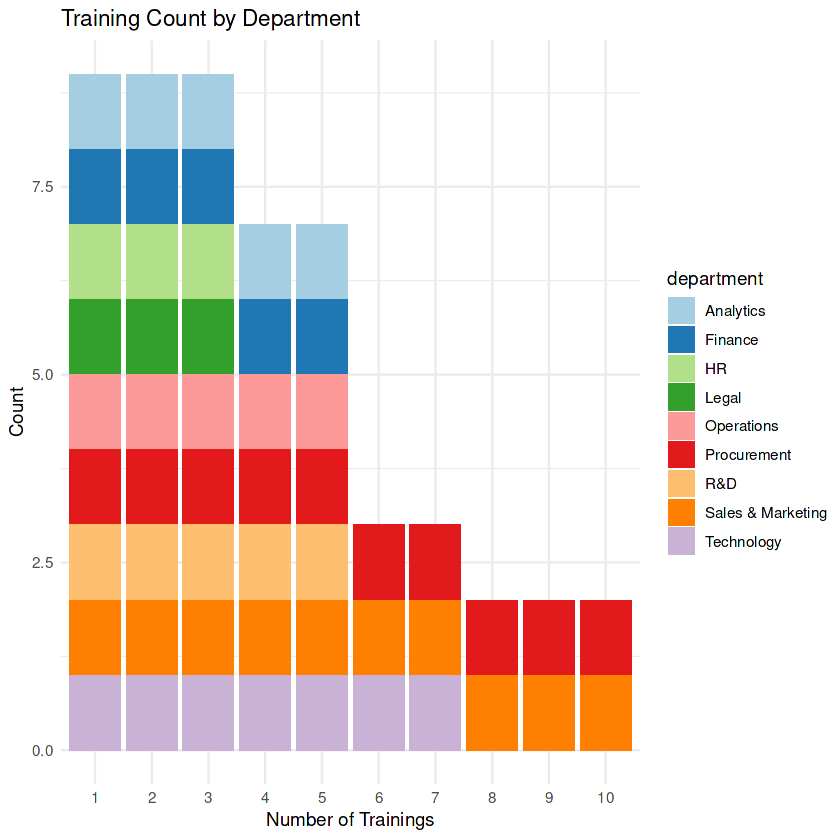

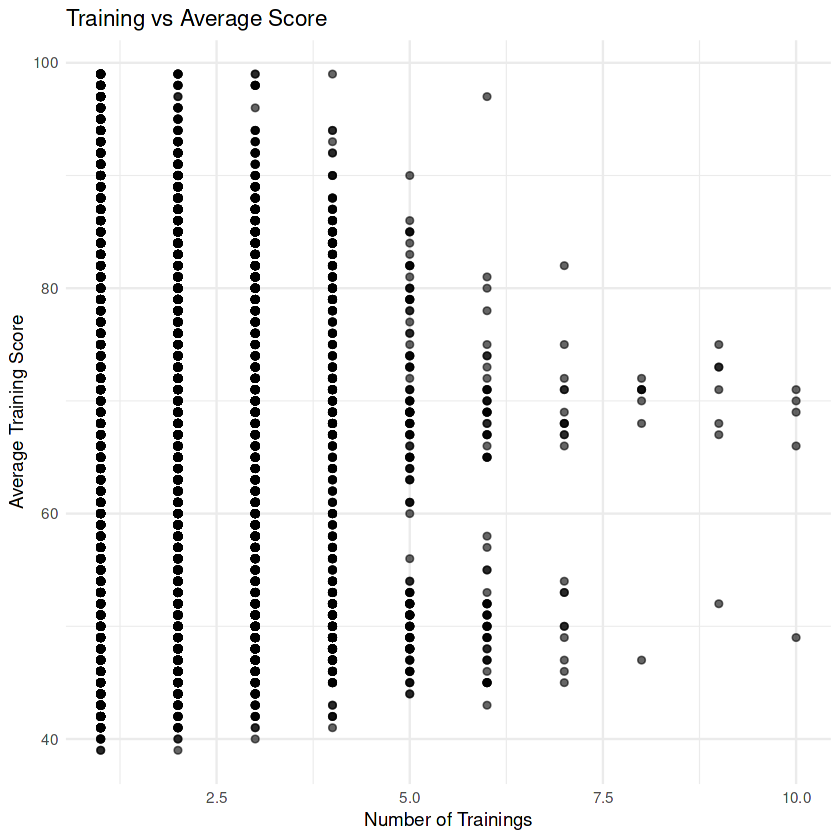

In [48]:
#Distribution of no_of_trainings and avg_training_score

no_training <- arrange_hr_data %>%
group_by(department, no_of_trainings) %>%
summarise(count = n(),.groups = 'drop') 

avg_training <- arrange_hr_data %>%
group_by(department, avg_training_score) %>%
summarise(count = n(),.groups = 'drop')


#identify is their any patterns

pattern <- ggplot(no_training, aes(x = as.factor(no_of_trainings),fill = department)) +
           geom_bar() +
           labs(title = "Training Count by Department", x = "Number of Trainings", y = "Count") +
           theme_minimal()+
           scale_fill_brewer(palette = "Paired")
pattern

#identify is their any anomalies
anomalies <- ggplot(arrange_hr_data, aes(x = no_of_trainings, y = avg_training_score)) +
             geom_point(alpha = 0.6) +
             labs(title = "Training vs Average Score", x = "Number of Trainings", y = "Average Training Score") +
             theme_minimal()
anomalies

In [49]:
# percentage of employees met KPIs

# Filter rows where KPIs_met >80%
KPI <- arrange_hr_data %>%
  filter(`KPIs_met >80%` == 1) %>%  
  summarise(percentage = (n() / nrow(arrange_hr_data)) * 100)

#extract percentage value 
percentage <- KPI$percentage

# Print the result
cat("Percentage of employees who met KPIs (>80%):",percentage,"%\n")


# percentage of employees met won awards

# Filter rows where awards_won
Awards <- arrange_hr_data %>%
filter(`awards_won?` == 1) %>%
summarise(percentage = (n() / nrow(arrange_hr_data)) * 100)

#extract percentage value 
percentage <- Awards$percentage

# Print the result
cat("Percentage of employees who met won awards:", percentage ,"%\n")


Percentage of employees who met KPIs (>80%): 35.4032 %
Percentage of employees who met won awards: 2.305295 %


In [50]:
# average of previous_year_rating for employees who were promoted (is_promoted = 1) compared to those who were not?

avg_rating <- arrange_hr_data %>%
filter(!is.na(is_promoted)) %>% 
  group_by(is_promoted) %>%
  summarise(avg_rating = mean(previous_year_rating, na.rm=TRUE)) %>%
  pivot_wider(names_from = is_promoted, values_from = avg_rating, 
              names_prefix = "avg_")
avg_rating

avg_0,avg_1
<dbl>,<dbl>
3.267911,3.98614


In [51]:
#significant differences in avg_training_score between employees who were promoted and those who were not?

avg_training_score <- arrange_hr_data %>%
filter(!is.na(is_promoted))%>%
group_by(is_promoted)%>%
summarise(avg_score = mean(avg_training_score, na.rm=TRUE))%>%
pivot_wider(names_from = is_promoted, values_from = avg_score, names_prefix = 'promoted_')
avg_training_score

promoted_0,promoted_1
<dbl>,<dbl>
62.64769,71.32519


gender,total_employees,promoted_employees,promotion_rate
<chr>,<int>,<int>,<dbl>
f,16312,1467,8.993379
m,38496,3201,8.315150



	Pearson's Chi-squared test with Yates' continuity correction

data:  promotion_table
X-squared = 6.6773, df = 1, p-value = 0.009765


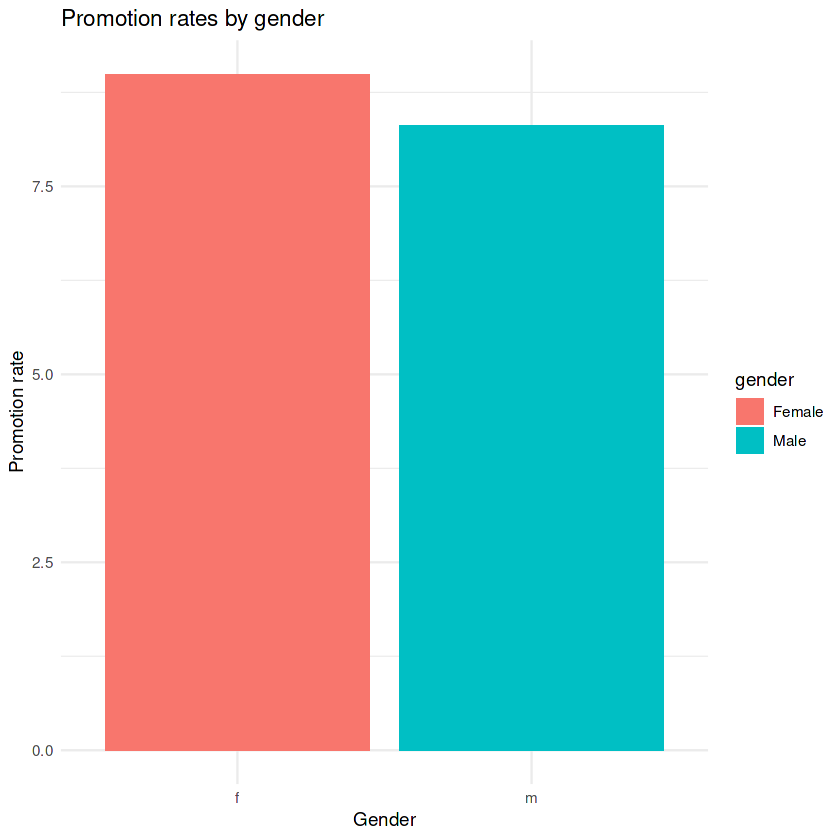

In [52]:
# promotion rates difference between male and female employees and there potential reasons?

# promotion rates of male and female employees

gender_promotion <- arrange_hr_data %>%
filter(!is.na(is_promoted)) %>%
group_by(gender) %>%
summarise(
    total_employees = n(),
    promoted_employees = sum(is_promoted == 1, na.rm = TRUE),
    promotion_rate = (promoted_employees / total_employees) * 100
  )
gender_promotion

#visual data results
gender_promo <- ggplot(gender_promotion, aes(x=gender, y = promotion_rate, fill=gender))+
                geom_bar(stat = 'identity')+
                labs(title = 'Promotion rates by gender',
                    x = 'Gender',
                    y = 'Promotion rate')+
                scale_fill_discrete(label = c('Female','Male'))+
                theme_minimal()
gender_promo


# promotion rates difference between male and female employees

promotion_table <- table(arrange_hr_data$gender,arrange_hr_data$is_promoted)

chisq_test <- chisq.test(promotion_table)
chisq_test

From the analysis, females have approx 0.6% a higher promotion rate compared to males. Statistical tests confirmed that the difference is significant (p < 0.05)


## Research
Analyzing the potential reason based on performance, traning sessions and Department-level promotion rates by gender.

In [53]:
# Performance metric average by gender.

print('KPIs met metric average by gender.')
Avg_KPI_met <- arrange_hr_data %>%
group_by(gender)%>%
summarise(average = mean(`KPIs_met >80%`,na.rm = TRUE)*100)%>%
pivot_wider(names_from=gender, values_from=average)%>%
rename(Female=f, Male=m)
Avg_KPI_met

# Training session average by gender.

print('Average No.of trainings by gender.')
Avg_trainings <- arrange_hr_data %>%
group_by(gender)%>%
summarise(average = mean(no_of_trainings,na.rm = TRUE))%>%
pivot_wider(names_from = gender, values_from = average)%>%
rename(Female = f, Male = m)
Avg_trainings

# Department wise gender bias .

print('Count of promoted employees by departments.')
department <- arrange_hr_data%>%
filter(is_promoted == 1)%>%
group_by(department, gender)%>%
summarise(count = n(),.groups='drop') %>%
arrange(count) %>%
pivot_wider(names_from=gender, values_from = count)
department

[1] "KPIs met metric average by gender."


Female,Male
<dbl>,<dbl>
38.19702,34.22638


[1] "Average No.of trainings by gender."


Female,Male
<dbl>,<dbl>
1.174351,1.286666


[1] "Count of promoted employees by departments."


department,f,m
<chr>,<int>,<int>
Legal,6,47
R&D,6,63
Finance,55,151
HR,58,78
Analytics,62,450
Sales & Marketing,176,1037
Technology,277,491
Procurement,385,303
Operations,442,581


## Potential reason

The analysis reveals some key insights into performance, training, and promotion metrics by gender within the organization:

**Performance (KPIs met):** On average, female employees performed slightly better than male employees in meeting KPIs (>80%), with 38.20% of females meeting the target compared to 34.23% of males.

**Training Sessions:** Male employees, on average, participated in slightly more training sessions (1.29) than female employees (1.17). This indicates a small gender difference in training opportunities or participation rates.

**Promotions by Department:** Promotion counts vary significantly by department and gender.

Female employees received fewer promotions in most departments compared to males, particularly in departments like Sales & Marketing (176 females vs. 1037 males) and Technology (277 females vs. 491 males).
However, in other departments like Procurement and Operations, female employees received higher promotions than in other departments, though male promotions still high overall.

These findings suggest potential areas for improving gender equity in training, performance recognition, and promotions, especially in departments where disparities are pronounced. Targeted efforts to balance opportunities for growth and advancement can help create a more inclusive workplace.

#### Identifying the significant differences in avg_training_score,length_of_service, or previous_year_rating based on gender

Performing the mean and two sample t-test to compare the means of two independent group.

**Assumptions:**
The data for each group is normally distributed.
The variances of the two groups are are distributed or not that can be checked using t-test.


In [54]:
# calculate the mean of avg_training_score,length_of_service, or previous_year_rating based on gender

all_the_avg <- arrange_hr_data%>%
group_by(gender)%>%
summarise(avg_training_score = mean(avg_training_score, na.rm = TRUE),
          avg_length_of_service = mean(length_of_service, na.rm = TRUE),
          avg_previous_year_rating = mean(previous_year_rating, na.rm = TRUE))

# perform t-test to identify the significant difference

training_score_test <- t.test(avg_training_score ~ gender, data = arrange_hr_data)
t.test(length_of_service ~ gender, data = arrange_hr_data)
t.test(previous_year_rating ~ gender, data = arrange_hr_data)
training_score_test


	Welch Two Sample t-test

data:  length_of_service by gender
t = 4.9515, df = 43031, p-value = 7.392e-07
alternative hypothesis: true difference in means between group f and group m is not equal to 0
95 percent confidence interval:
 0.1000393 0.2311302
sample estimates:
mean in group f mean in group m 
       5.965483        5.799898 



	Welch Two Sample t-test

data:  previous_year_rating by gender
t = 6.4285, df = 41514, p-value = 1.303e-10
alternative hypothesis: true difference in means between group f and group m is not equal to 0
95 percent confidence interval:
 0.04534377 0.08512267
sample estimates:
mean in group f mean in group m 
       3.378028        3.312795 



	Welch Two Sample t-test

data:  avg_training_score by gender
t = 7.4161, df = 50722, p-value = 1.225e-13
alternative hypothesis: true difference in means between group f and group m is not equal to 0
95 percent confidence interval:
 0.5355846 0.9203872
sample estimates:
mean in group f mean in group m 
       63.86189        63.13390 


### **length of service by gender output explanation**

Welch Two Sample t-test proves that p-value: 7.392e-07

The p-value is extremely small (less than 0.05), indicating a statistically significant difference in the mean length of service between males and females.

**Mean Values:**

Females: 5.97

Males: 5.80

On average, females have slightly higher lengths of service compared to males.
The difference is small but statistically significant, with a 95% confidence interval of (0.10 , 0.23).

### **previous_year_rating by gender output explanation**

Welch Two Sample t-test proves that p-value = 1.303e-10

The p-value is extremely small (less than 0.05), indicating a statistically significant difference in the mean previous year rating between males and females.

**Mean Values:**

Females: 3.38

Males: 3.32

On average, females have slightly higher rating compared to males.
The difference is small but statistically significant, with a 95% confidence interval of (0.045 , 0.085).

### **avg_training_score by gender output explanation**

Welch Two Sample t-test proves that p-value = 1.225e-13

The p-value is less than 0.05, indicating a statistically significant difference in the mean previous year rating between males and females.

**Mean Values:**

Females: 63.87

Males: 63.14

On average, females have slightly higher training score compared to males.
The difference is small but statistically significant, with a 95% confidence interval of (0.53 , 0.92).

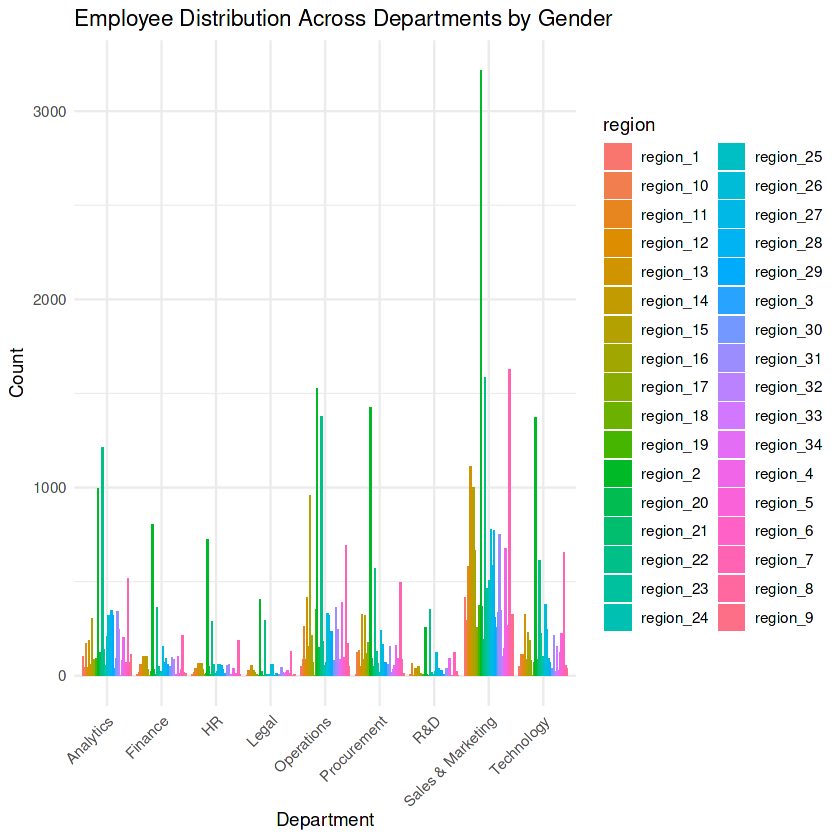

In [55]:
#Does the distribution of employees across departments or regions vary by gender

gender_data <- arrange_hr_data %>%                                      
group_by(region,gender,department) %>%
summarise(count = n(),.groups='drop') %>%
arrange(count) %>% 
pivot_wider(names_from = gender, values_from = count, values_fill = 0)%>%
rename(Female = f, Male = m, Department = department)

ggplot(gender_data, aes(x = Department, y = Male, fill = region)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Employee Distribution Across Departments by Gender",
       x = "Department", y = "Count") +
  theme_minimal()+
theme(axis.text.x = element_text(angle = 45, hjust = 1))


### **Observations:**

*The distribution of employees across regions and departments shows noticeable differences by gender:*

***Region 2, Sales & Marketing Department:*** The number of male employees (3,216) is significantly higher than female employees (1,492), indicating a strong male presence in this combination.

***Region 1, Legal Department:*** Male employees (1) slightly outnumber female employees (0), showing a marginal gender difference.

***Region 17, Finance Department:*** Male employees (1) are slightly higher than female employees (0), reflecting a similar trend of minimal gender disparity.

***Region 18, Technology Department:*** Female employees (1) slightly outnumber male employees (0), showcasing a rare instance where female representation is higher.

These insights highlight areas with potential gender imbalances that may warrant further investigation or corrective actions.


In [56]:
#Employees with higher avg_training_score have a higher likelihood of being promoted?

compare <- arrange_hr_data %>%
filter(!is.na(is_promoted)) %>%
group_by(avg_training_score) %>%
summarise(total_promoted = sum(is_promoted, na.rm = TRUE),
          count = n(),
          promotion_rate = mean(is_promoted, na.rm = TRUE)*100)%>%
arrange(desc(promotion_rate))
head(compare,8)

avg_training_score,total_promoted,count,promotion_rate
<dbl>,<dbl>,<int>,<dbl>
95,45,45,100.00000
97,49,49,100.00000
98,37,37,100.00000
99,35,35,100.00000
96,47,48,97.91667
94,63,65,96.92308
93,75,84,89.28571
92,81,99,81.81818


**Observation:**

The data indicates a positive relationship between higher average training scores and the likelihood of promotion. Employees with avg_training_score of 95 or above have a 100% promotion rate. This suggests that higher training scores significantly enhance the likelihood of being promoted.





`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


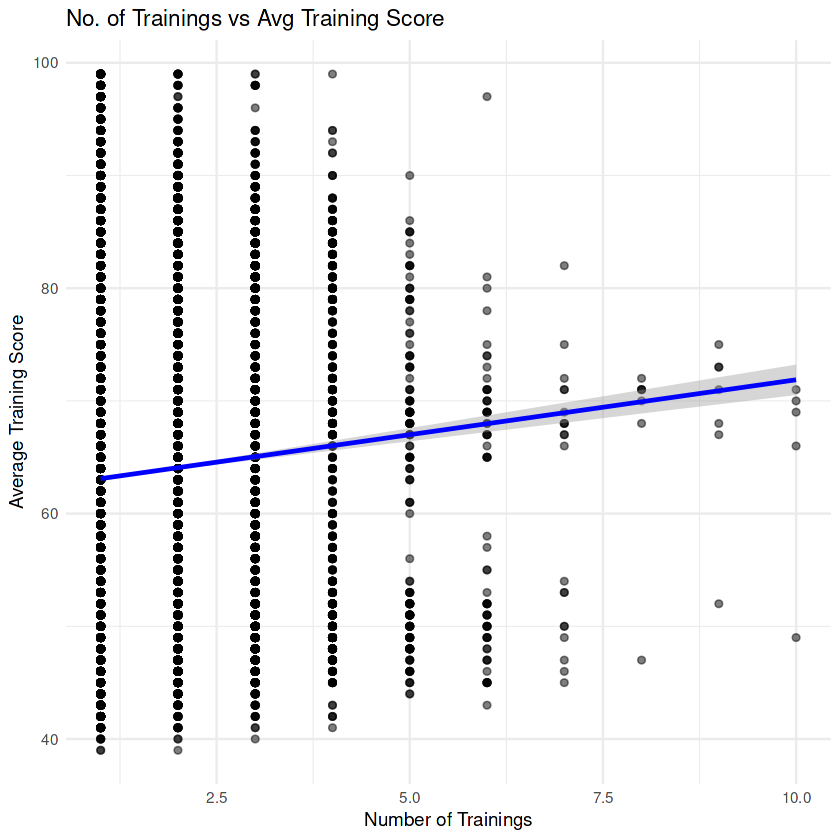

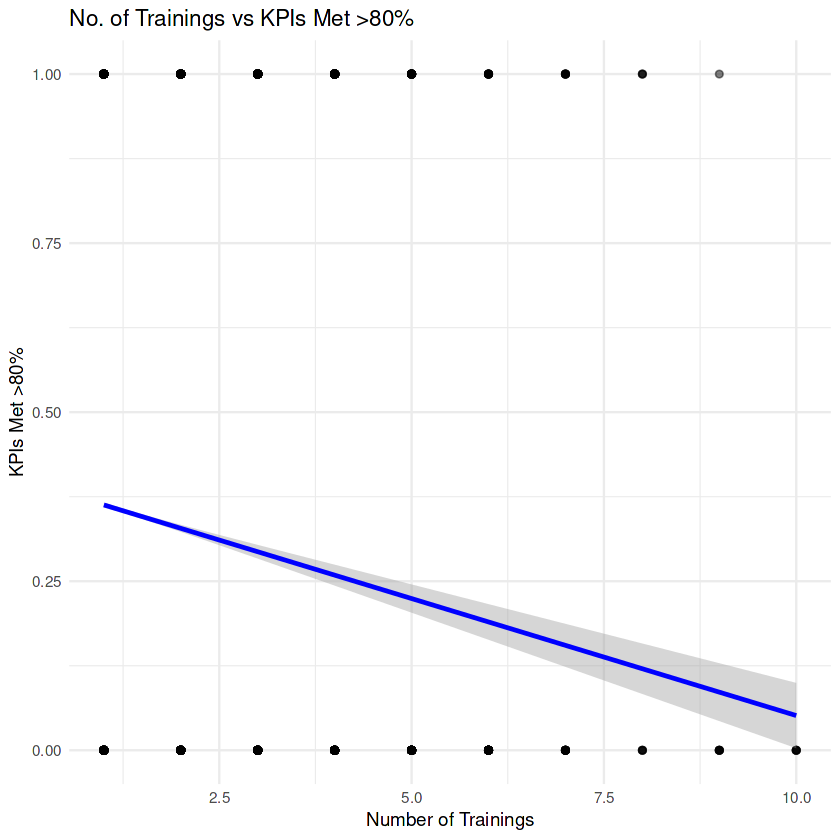

In [57]:
#no_of_trainings correlate with avg_training_score and KPIs_met >80%?


# Scatter plot: no_of_trainings vs avg_training_score

scatter_plot <- ggplot(arrange_hr_data, aes(x = no_of_trainings, y = avg_training_score)) +
                geom_point(alpha = 0.5) +
                geom_smooth(method = "lm", col = "blue") +
                labs(title = "No. of Trainings vs Avg Training Score",
                x = "Number of Trainings",  
                y = "Average Training Score") +
                theme_minimal()
scatter_plot

# Scatter plot: no_of_trainings vs KPIs_met >80%

scatter_plot_2 <- ggplot(arrange_hr_data, aes(x = no_of_trainings, y = `KPIs_met >80%`)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "No. of Trainings vs KPIs Met >80%",
       x = "Number of Trainings", y = "KPIs Met >80%") +
  theme_minimal()
scatter_plot_2

In [58]:
#Measure the strength and direction of the relationships.

cor_trainings_score <- cor(arrange_hr_data$no_of_trainings, arrange_hr_data$avg_training_score, use = "complete.obs")
print(paste("Correlation between No. of Trainings and Avg Training Score:", cor_trainings_score))


cor_KPI_met <- cor(arrange_hr_data$no_of_trainings, arrange_hr_data$`KPIs_met >80%`, use = 'complete.obs')
print(paste('correlation between No. of trainings and KPIs_met >80%:',cor_KPI_met))


[1] "Correlation between No. of Trainings and Avg Training Score: 0.0441800192491873"
[1] "correlation between No. of trainings and KPIs_met >80%: -0.0439115184415033"


**observation:**

Correlation between No. of Trainings and Avg Training Score: 0.045 No linear relationship exists between the two variables, as it results 0.045.

correlation between No. of trainings and KPIs_met >80%: -0.043 there is a negative correlation between trainings and KPIs_met >80% as the number of trainings increases, the average training score decreases.
.


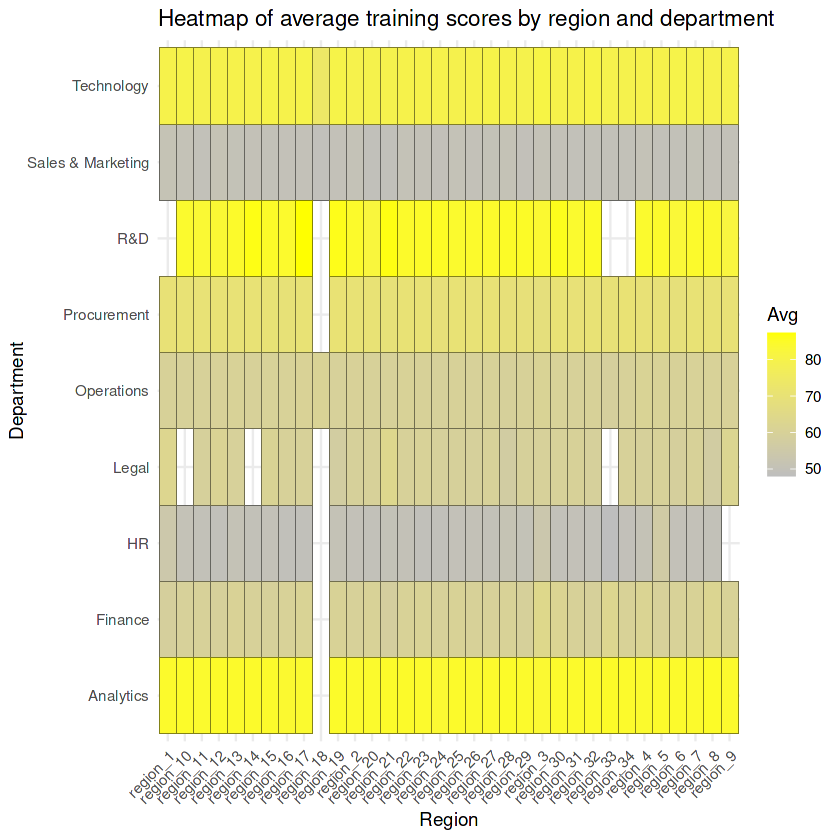

In [59]:
#Are there departments or regions with lower average training scores? What might be the implications?

dep_reg <- arrange_hr_data %>%
group_by(region,department) %>%
summarise(Avg = mean(avg_training_score, na.rm= TRUE), .groups = 'drop') %>%
arrange(Avg)

heat <- ggplot(dep_reg, aes(x = region, y = department))+
           geom_tile(aes(fill = Avg), color = 'black')+
           scale_fill_gradient(high = 'yellow', low = 'grey')+
           labs(title = 'Heatmap of average training scores by region and department',
                x = 'Region',
                y = 'Department')+
           theme_minimal()+
           theme(axis.text.x = element_text(angle = 45, hjust = 1))
heat


### Conclusion based on findings

**Overall Observations:**

- The lowest average training scores are concentrated in the HR and Sales & Marketing departments across multiple regions.
- Specifically, HR in Region_33 has the lowest average training score of 48, while Sales & Marketing in Region_18 has an average of 49.13.

**further analysis**

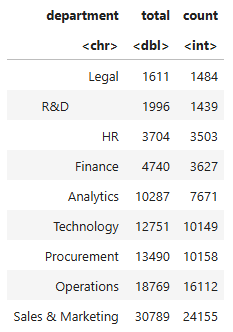

The analysis shows that Sales & Marketing and Operations departments have the highest total counts and training conducted, indicating a focus on these areas due to their likely operational importance. This data highlights the need for tailored training strategies, especially for departments with high employee counts but lower training completion rates, to ensure consistent performance improvements across the organization.

Investigate why HR and Sales & Marketing departments, particularly in these regions, have lower training scores. Potential factors to explore:

* Access to training resources.
* Frequency and quality of training sessions.
* Regional or department-specific challenges


**5. Key Drivers of Promotions**

What factors (e.g., length_of_service, previous_year_rating, avg_training_score, KPIs_met >80%, awards_won?) are most predictive of promotions (is_promoted)?

Does the likelihood of promotion vary significantly by department or recruitment channel?

Are employees with longer length_of_service more likely to be promoted?

In [67]:
#clean data for predective models

cleaned_data <- arrange_hr_data %>%
  filter(!is.na(is_promoted) &
         !is.na(length_of_service) &
         !is.na(previous_year_rating) &
         !is.na(avg_training_score) &
         !is.na(`KPIs_met >80%`) &
         !is.na(`awards_won?`))
head(cleaned_data,6)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3,5,0,0,85,0
2,2,Finance,region_2,Master's & above,f,sourcing,1,35,1,2,0,0,63,0
3,4,Sales & Marketing,region_2,Bachelor's,m,other,1,25,3,2,0,0,53,0
4,5,Analytics,region_7,Master's & above,m,other,2,46,3,7,0,0,86,0
5,7,Operations,region_32,Bachelor's,m,other,1,31,3,7,0,0,59,0
6,8,Sales & Marketing,region_7,Bachelor's,m,other,1,42,5,6,1,0,52,0


In [70]:
cleaned_data$is_promoted <- as.factor(cleaned_data$is_promoted)


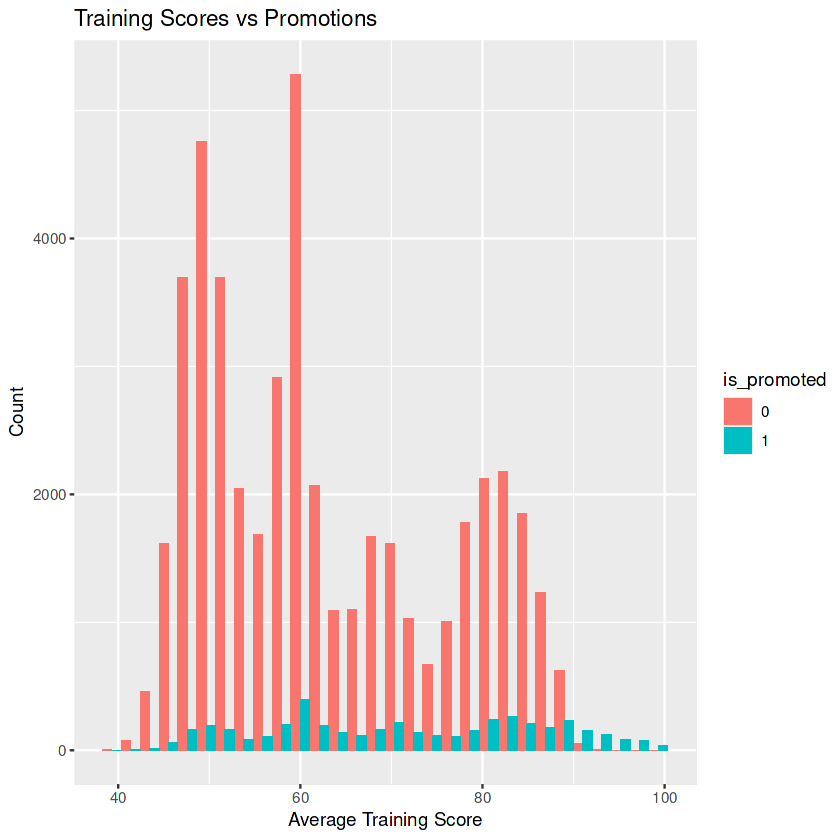

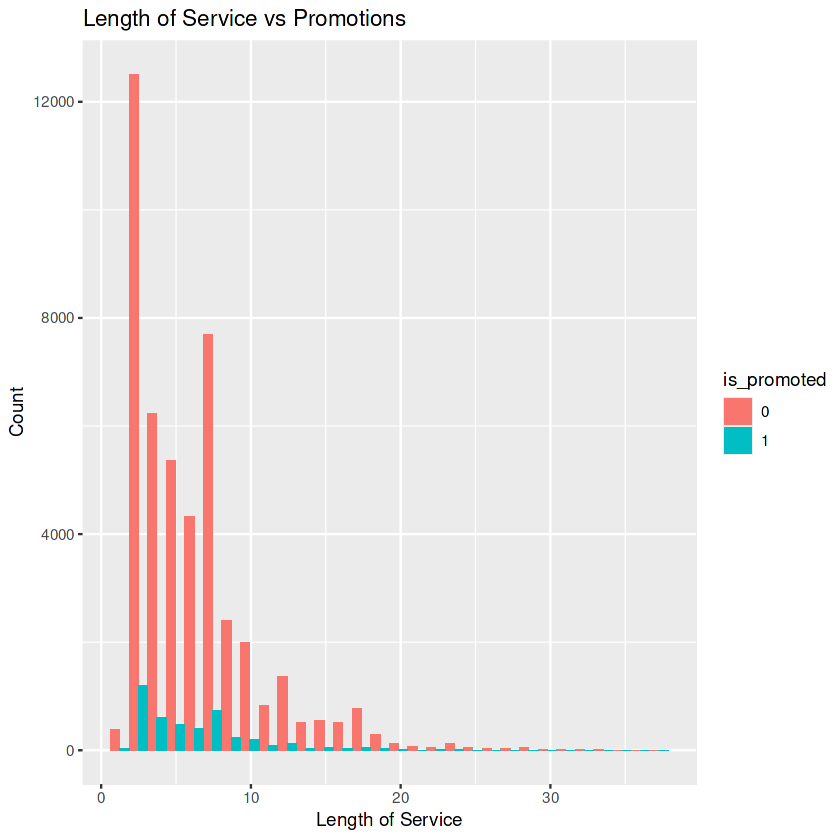

In [71]:
# Visualize correlations with promotions
ggplot(cleaned_data, aes(x = avg_training_score, fill = is_promoted)) +
  geom_histogram(bins = 30, position = "dodge") +
  labs(title = "Training Scores vs Promotions", x = "Average Training Score", y = "Count")

ggplot(cleaned_data, aes(x = length_of_service, fill = is_promoted)) +
  geom_histogram(bins = 30, position = "dodge") +
  labs(title = "Length of Service vs Promotions", x = "Length of Service", y = "Count")


In [83]:
# Calculate correlation for numeric variables

cleaned_data <- cleaned_data %>%
select(length_of_service, previous_year_rating, avg_training_score, `KPIs_met >80%`, `awards_won?`)

correlations <- cor(cleaned_data, use = "complete.obs")
print(correlations)

set.seed(123)
train_index <- createDataPartition(cleaned_data$is_promoted, p = 0.8, list = FALSE)
train_data <- cleaned_data[train_index, ]
test_data <- cleaned_data[-train_index, ]


                     length_of_service previous_year_rating avg_training_score
length_of_service          1.000000000          0.000252746        -0.04226047
previous_year_rating       0.000252746          1.000000000         0.07513911
avg_training_score        -0.042260471          0.075139112         1.00000000
KPIs_met >80%             -0.085925804          0.351578457         0.07896014
awards_won?               -0.043845624          0.027738155         0.07256739
                     KPIs_met >80% awards_won?
length_of_service      -0.08592580 -0.04384562
previous_year_rating    0.35157846  0.02773816
avg_training_score      0.07896014  0.07256739
KPIs_met >80%           1.00000000  0.09654194
awards_won?             0.09654194  1.00000000


ERROR: Error in createDataPartition(cleaned_data$is_promoted, p = 0.8, list = FALSE): could not find function "createDataPartition"
